In [1]:
import os
from dotenv import load_dotenv, find_dotenv
from os.path import join, dirname, basename, exists, isdir

### Load environmental variables from the project root directory ###
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# now you can get the variables using their names

# Check whether a network drive has been specified
DATABASE = os.environ.get("NETWORK_URL")
if DATABASE == 'None':
    pass
else:
    pass
    #mount network drive here

# set up directory pathsa
CURRENT_DIR = os.getcwd()
PROJ = dirname(dotenv_path) # project root directory

DATA = join(PROJ, 'data') #data directory
RAW_EXTERNAL = join(DATA, 'raw_external') # external data raw directory
RAW_INTERNAL = join(DATA, 'raw_internal') # internal data raw directory
INTERMEDIATE = join(DATA, 'intermediate') # intermediate data directory
FINAL = join(DATA, 'final') # final data directory

RESULTS = join(PROJ, 'results') # output directory
FIGURES = join(RESULTS, 'figures') # figure output directory
PICTURES = join(RESULTS, 'pictures') # picture output directory


# make folders specific for certain data
folder_name = ''
if folder_name != '':
    #make folders if they don't exist
    if not exists(join(RAW_EXTERNAL, folder_name)):
        os.makedirs(join(RAW_EXTERNAL, folder_name))

    if not exists(join(INTERMEDIATE, folder_name)):
        os.makedirs(join(INTERMEDIATE, folder_name))

    if not exists(join(FINAL, folder_name)):
        os.makedirs(join(FINAL, folder_name))


print('Standard variables loaded, you are good to go!')

Standard variables loaded, you are good to go!


In [12]:
import pandas as pd
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
proteomics_dataset = f"{INTERMEDIATE}/proteomics/proteomics_concentrations.csv"
pca_df_all_proteomics_and_pyr = pd.read_csv(proteomics_dataset, index_col="UP")#.loc[df.index,:]
principalDf

,principal component 1,principal component 2
lb,-14.329045,-9.494406
lb1,-14.001396,-17.724563
lb2,-12.642646,-14.161158
glucose,-14.196506,-15.066180
glucose1,-13.853848,-14.791023
...,...,...
succinate1,-19.645454,-3.850607
succinate2,-18.931522,-2.836246
fructose,-17.607870,-10.210420
fructose1,-17.047579,-9.546486


KeyError: 'pyr_1'

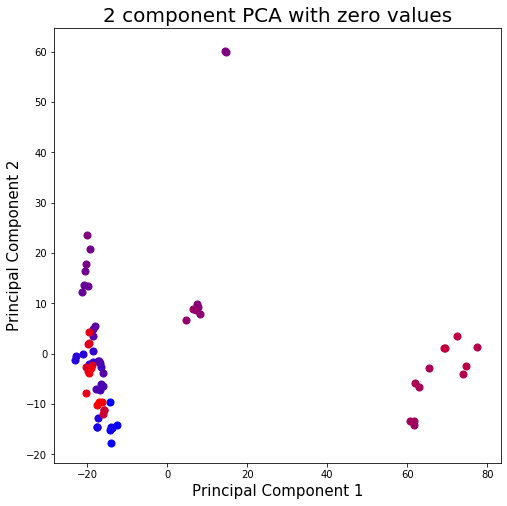

In [14]:
from sklearn.preprocessing import StandardScaler

# standardize data for pca 
# #features = ['sepal length', 'sepal width', 'petal length', 'petal width']# Separating out the features
pca_df_all_proteomics_and_pyr = pd.read_csv(proteomics_dataset, index_col="UP")#.loc[df.index,:]

#pca_df_all_proteomics_and_pyr['pyr_1'] = abs_usages_1
pca_df_all_proteomics_and_pyr = pca_df_all_proteomics_and_pyr.T.dropna(axis='columns')
x = pca_df_all_proteomics_and_pyr.values
x = StandardScaler().fit_transform(x)

# run pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.index = pca_df_all_proteomics_and_pyr.index


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA with zero values', fontsize = 20)

amount = len(principalDf.index)
for i in range(amount):
    c = [float(i)/float(amount), 0.0, float(amount-i)/float(amount)] #R,G,B
    ax.scatter(principalDf.loc[principalDf.index[i], 'principal component 1']
           , principalDf.loc[principalDf.index[i], 'principal component 2']
           , color = c 
           , s = 50)
ax.scatter(principalDf.loc["pyr_1", 'principal component 1']
           , principalDf.loc[principalDf.index[i], 'principal component 2']
           , color = "green"
           , s = 50)


#ax.legend(pca_df_all_proteomics_and_pyr.index)
ax.grid()
#plt.savefig(f'{FIGURES}/')
